In [1]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import matplotlib.pyplot as plt
import numpy as np
from ggplot import *

/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 days 16 hours 4 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.4
H2O cluster version age:,8 months and 10 days !!!
H2O cluster name:,H2O_from_python_chengquanguan_lgthrc
H2O cluster total nodes:,1
H2O cluster free memory:,3.465 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [3]:
train=h2o.import_file("/Users/chengquanguan/Downloads/df1.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
train.shape

(500, 86)

In [5]:
train=train.na_omit()
train.shape

(499, 86)

In [6]:
train

C1,ACCESS2,BPMED,CHECKUP,CHOLSCREEN,COLON_SCREEN,COREM,COREW,DENTAL,MAMMOUSE,PAPTEST,BINGE,CSMOKING,LPA,OBESITY,SLEEP,ARTHRITIS,BPHIGH,CANCER,CASTHMA,CHD,COPD,DIABETES,HIGHCHOL,KIDNEY,MHLTH,PHLTH,STROKE,TEETHLOST,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,y
"('Birmingham_Alabama',)",19.6,81.3,76.7,74.8,61.1,29.9,27.3,49.3,76.8,78.6,11.3,24.4,37,41.9,46.5,30.9,43.8,5.7,11.5,7.7,9.1,16.8,39.2,3.6,15.6,16.4,5.2,26.1,384.16,6609.69,5882.89,5595.04,3733.21,894.01,745.29,2430.49,5898.24,6177.96,127.69,595.36,1369,1755.61,2162.25,954.81,1918.44,32.49,132.25,59.29,82.81,282.24,1536.64,12.96,243.36,268.96,27.04,681.21,2.97553,4.39815,4.3399,4.31482,4.11251,3.39786,3.30689,3.89792,4.3412,4.36437,2.4248,3.19458,3.61092,3.73529,3.83945,3.43076,3.77963,1.74047,2.44235,2.04122,2.20827,2.82138,3.66868,1.28093,2.74727,2.79728,1.64866,3.26194,125725
"('Hoover_Alabama',)",9.7,77.7,73.6,82.1,72.4,41.7,41.5,72.7,79.7,85.8,14.9,14.1,23.7,28.6,34.6,25.3,30.7,6.6,8.6,5,5.2,8.1,35.9,2.2,10.4,9.4,2.2,9.6,94.09,6037.29,5416.96,6740.41,5241.76,1738.89,1722.25,5285.29,6352.09,7361.64,222.01,198.81,561.69,817.96,1197.16,640.09,942.49,43.56,73.96,25,27.04,65.61,1288.81,4.84,108.16,88.36,4.84,92.16,2.27213,4.35286,4.29865,4.40794,4.28221,3.7305,3.72569,4.28634,4.37827,4.45202,2.70136,2.64617,3.16548,3.35341,3.54385,3.2308,3.42426,1.88707,2.15176,1.60944,1.64866,2.09186,3.58074,0.788457,2.34181,2.24071,0.788457,2.26176,48349.5
"('Huntsville_Alabama',)",15.1,79,73.3,76.8,65,39.5,36.6,60.7,76.9,82.4,11.8,19.1,26.9,33.8,39.2,27.5,36.8,6.6,9.8,6.5,7.6,11.5,38.9,2.8,13.3,13.3,3.4,14.9,228.01,6241,5372.89,5898.24,4225,1560.25,1339.56,3684.49,5913.61,6789.76,139.24,364.81,723.61,1142.44,1536.64,756.25,1354.24,43.56,96.04,42.25,57.76,132.25,1513.21,7.84,176.89,176.89,11.56,222.01,2.71469,4.36945,4.29456,4.3412,4.17439,3.6763,3.60005,4.10594,4.34251,4.41159,2.4681,2.94969,3.29213,3.52046,3.66868,3.31419,3.6055,1.88707,2.28238,1.8718,2.02815,2.44235,3.66099,1.02962,2.58776,2.58776,1.22378,2.70136,106691
"('Mobile_Alabama',)",16.9,79.3,73.6,75.9,61.6,33.9,31.6,52.9,76,80.8,12.9,22.8,34.2,34.7,41.6,30.5,42,6.5,10.8,7.7,8.8,13.8,39.9,3.2,14.9,15.6,4.4,24.3,285.61,6288.49,5416.96,5760.81,3794.56,1149.21,998.56,2798.41,5776,6528.64,166.41,519.84,1169.64,1204.09,1730.56,930.25,1764,42.25,116.64,59.29,77.44,190.44,1592.01,10.24,222.01,243.36,19.36,590.49,2.82731,4.37324,4.29865,4.32942,4.12066,3.52342,3.45316,3.9684,4.33073,4.39198,2.55723,3.12676,3.53223,3.54674,3.7281,3.41773,3.73767,1.8718,2.37955,2.04122,2.17475,2.62467,3.68638,1.16315,2.70136,2.74727,1.4816,3.19048,115580
"('Montgomery_Alabama',)",17.4,78.9,74,75.9,62.1,31.6,27.2,57.1,77.1,81.7,12.3,22,30.9,38.9,41.1,29.8,40.3,6,11,6.7,8.2,13.1,37.4,3,14.9,15.4,4.1,21.2,302.76,6225.21,5476,5760.81,3856.41,998.56,739.84,3260.41,5944.41,6674.89,151.29,484,954.81,1513.21,1689.21,888.04,1624.09,36,121,44.89,67.24,171.61,1398.76,9,222.01,237.16,16.81,449.44,2.85647,4.36818,4.30407,4.32942,4.12875,3.45316,3.30322,4.0448,4.3451,4.40305,2.5096,3.09104,3.43076,3.66099,3.71601,3.39451,3.69635,1.79176,2.3979,1.90211,2.10413,2.57261,3.62167,1.09861,2.70136,2.73437,1.41099,3.054,121891
"('Tuscaloosa_Alabama',)",17.1,73.6,71.7,65.5,63.1,35.5,33.2,57.2,77.1,77.2,14.3,21.9,31.5,32.3,39.5,23.2,32.6,4.6,10.9,5.4,7.1,10.3,35,2.5,16.1,13.2,3.2,20.9,292.41,5416.96,5140.89,4290.25,3981.61,1260.25,1102.24,3271.84,5944.41,5959.84,204.49,479.61,992.25,1043.29,1560.25,538.24,1062.76,21.16,118.81,29.16,50.41,106.09,1225,6.25,259.21,174.24,10.24,436.81,2.83908,4.29865,4.27249,4.18205,4.14472,3.56953,3.50255,4.04655,4.3451,4.3464,2.66026,3.08649,3.44999,3.47507,3.6763,3.14415,3.48431,1.52606,2.38876,1.6864,1.96009,2.33214,3.55535,0.916291,2.77882,2.58022,1.16315,3.03975,53591.5
"('Anchorage_Alaska',)",15.1,63.7,55.1,68.8,57.5,32.4,28.8,65.8,68.9,78.3,20.6,17.9,21.7,30.2,

In [7]:
train.summary()

,C1,ACCESS2,BPMED,CHECKUP,CHOLSCREEN,COLON_SCREEN,COREM,COREW,DENTAL,MAMMOUSE,PAPTEST,BINGE,CSMOKING,LPA,OBESITY,SLEEP,ARTHRITIS,BPHIGH,CANCER,CASTHMA,CHD,COPD,DIABETES,HIGHCHOL,KIDNEY,MHLTH,PHLTH,STROKE,TEETHLOST,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,y
type,string,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,NaN,4.1,55.4,51.9,45.7,43.5,17.4,16.2,39.4,62.7,62.5,8.4,8.1,13.3,15.0,24.4,9.2,15.6,2.8,6.6,2.5,2.8,4.1,24.2,1.7,7.6,7.0,1.4,4.9,16.81,3069.16,2693.61,2088.49,1892.25,302.76,262.44,1552.36,3931.29,3906.25,70.56,65.61,176.89,225.0,595.36,84.64,243.36,7.84,43.56,6.25,7.84,16.81,585.64,2.89,57.76,49.0,1.96,24.01,1.410986974,4.014579594,3.94931879,3.822098298,3.772760938,2.856470206,2.785011242,3.673765816,4.138361448,4.135166557,2.128231706,2.091864062,2.587764035,2.708050201,3.194583132,2.219203484,2.747270914,1.029619417,1.887069649,0.916290732,1.029619417,1.410986974,3.186352633,0.530628251,2.028148247,1.945910149,0.336472237,1.589235205,4161.03
mean,NaN,16.46392785571142,72.54088176352704,67.537875751503,72.77154308617234,61.111222444889776,31.383967935871745,29.93947895791583,61.941082164328655,75.27014028056111,79.52124248496993,16.918436873747492,17.628456913827655,25.511823647294587,28.81482965931864,35.630060120240486,21.649699398797598,29.39879759519038,5.715430861723447,9.224649298597194,5.46312625250501,5.924448897795592,9.820240480961925,34.423246492985974,2.599198396793587,12.577755511022042,12.362324649298596,2.9044088176352707,14.587575150300603,313.83472945891776,5282.728517034068,4588.303927855712,5322.86384769539,3766.573326653306,1010.9259719438877,921.7688977955912,3893.2732264529054,5680.994388777555,6337.343507014029,292.72975951903805,328.872625250501,687.920641282565,861.5804008016032,1289.4273346693387,486.36529058116224,889.4520641282566,33.64496993987975,86.47132264529058,31.394609218436873,37.616052104208414,102.29841683366733,1194.1535871743486,6.943486973947896,162.6613026052104,159.26805611222446,9.0387374749499,237.58837675350696,2.7265469941963927,4.282168349529058,4.209730241787574,4.284674302064128,4.108188961242485,3.432570115697395,3.3842471513426853,4.118679410140281,4.319692765308617,4.374918761903808,2.8167410742144288,2.838987168815631,3.209976605507014,3.3409201483366737,3.5654294515931864,3.0560297730781563,3.366596694036072,1.7280006265731462,2.2139972001482966,1.6722718405871742,1.7440332973166333,2.2543476550981962,3.534758038360721,0.9417593276112225,2.5173204319118234,2.4928830755470943,1.0324474239218437,2.620318807138277,88880.52304609219
maxs,NaN,48.3,83.1,81.8,84.5,76.4,48.5,43.8,80.1,84.6,87.5,25.6,31.6,43.2,45.3,51.3,34.8,49.2,9.0,13.5,9.8,11.6,21.0,42.8,4.5,18.0,19.5,6.8,30.4,2332.89,6905.61,6691.24,7140.25,5836.96,2352.25,1918.44,6416.01,7157.16,7656.25,655.36,998.56,1866.24,2052.09,2631.69,1211.04,2420.64,81.0,182.25,96.04,134.56,441.0,1831.84,20.25,324.0,380.25,46.24,924.16,3.877431561,4.420044702,4.404277244,4.436751534,4.335982696,3.881563798,3.779633817,4.383275854,4.437934267,4.471638793,3.242592351,3.453157121,3.765840495,3.813307032,3.937690752,3.549617387,3.895893623,2.197224577,2.602689685,2.282382386,2.451005098,3.044522438,3.756538103,1.504077397,2.890371758,2.970414466,1.916922612,3.414442608,5496625.59
sigma,NaN,6.5467320247295975,4.5376484037652,5.195513616916761,5.217366719484999,5.6618070033151415,5.101439229848506,5.044550971799815,7.529221229353319,3.9282687486738923,3.7071608849124855,2.5

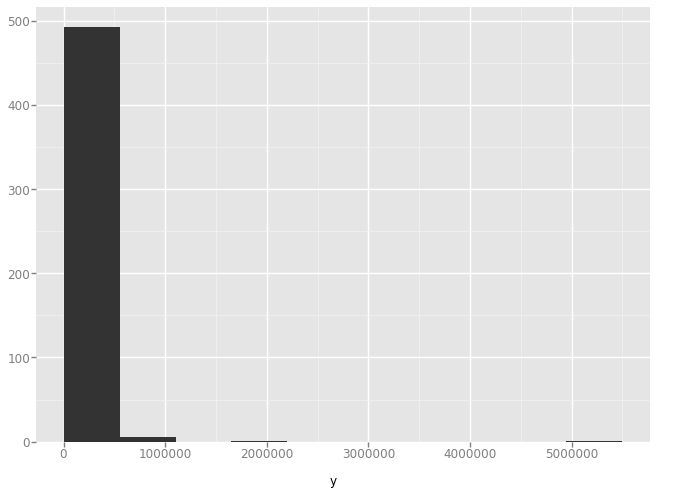

<ggplot: (7555379965)>

In [8]:
ggplot(aes(x="y"),data=train.as_data_frame())+geom_histogram()

In [9]:
train=train.as_data_frame()
train.drop(train[(train["y"]>200000)].index,inplace=True)
train=h2o.H2OFrame(train)
train.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%


(468, 86)

In [10]:
train1, valid1= train.split_frame([0.7])

In [11]:
valid1.shape

(128, 86)

In [12]:
y = 'y'
X = [name for name in train.columns if name not in ["C1",y]]

In [13]:
X
#C30-C85 represents square value and log value of the previous 28 dimensions

['ACCESS2',
 'BPMED',
 'CHECKUP',
 'CHOLSCREEN',
 'COLON_SCREEN',
 'COREM',
 'COREW',
 'DENTAL',
 'MAMMOUSE',
 'PAPTEST',
 'BINGE',
 'CSMOKING',
 'LPA',
 'OBESITY',
 'SLEEP',
 'ARTHRITIS',
 'BPHIGH',
 'CANCER',
 'CASTHMA',
 'CHD',
 'COPD',
 'DIABETES',
 'HIGHCHOL',
 'KIDNEY',
 'MHLTH',
 'PHLTH',
 'STROKE',
 'TEETHLOST',
 'C30',
 'C31',
 'C32',
 'C33',
 'C34',
 'C35',
 'C36',
 'C37',
 'C38',
 'C39',
 'C40',
 'C41',
 'C42',
 'C43',
 'C44',
 'C45',
 'C46',
 'C47',
 'C48',
 'C49',
 'C50',
 'C51',
 'C52',
 'C53',
 'C54',
 'C55',
 'C56',
 'C57',
 'C58',
 'C59',
 'C60',
 'C61',
 'C62',
 'C63',
 'C64',
 'C65',
 'C66',
 'C67',
 'C68',
 'C69',
 'C70',
 'C71',
 'C72',
 'C73',
 'C74',
 'C75',
 'C76',
 'C77',
 'C78',
 'C79',
 'C80',
 'C81',
 'C82',
 'C83',
 'C84',
 'C85']

In [14]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

glm = H2OGeneralizedLinearEstimator(family='gaussian',
                                         model_id='glm1',
                                         solver='IRLSM',
                                         standardize=True,
                                         lambda_search=True)

glm.train(X, y, training_frame=train1,
         validation_frame=valid1)


glm

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm1


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1302225677.5782416
RMSE: 36086.364150164
MAE: 26416.053727555252
RMSLE: 0.6564442293598656
R^2: -3.1086244689504383e-15
Mean Residual Deviance: 1302225677.5782416
Null degrees of freedom: 339
Residual degrees of freedom: 339
Null deviance: 442756730376.6022
Residual deviance: 442756730376.6022
AIC: 8104.574039622393

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 1521224115.458098
RMSE: 39002.87316926918
MAE: 29085.64692152492
RMSLE: 0.7210069197403535
R^2: -0.010471484573317591
Mean Residual Deviance: 1521224115.458098
Null degrees of freedom: 127
Residual degrees of freedom: 127
Null deviance: 194716686778.63654
Residual deviance: 194716686778.63654
AIC: 3073.5242564121045
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2018-11-19 07:25:41,0.000 sec,1,.16E5,1,1302225678.9530592,1521224135.8186917
,2018-11-19 07:25:41,0.003 sec,2,.15E5,4,1302223650.7014174,1521224803.6939240
,2018-11-19 07:25:41,0.005 sec,3,.14E5,4,1302221338.7356417,1521225558.3370240
,2018-11-19 07:25:41,0.007 sec,4,.14E5,4,1302218915.4382422,1521226349.3805094
,2018-11-19 07:25:41,0.008 sec,5,.13E5,4,1302216372.3000398,1521227179.6079743


In [15]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
nn_model2 = H2ODeepLearningEstimator(
    epochs=50,                    
    hidden=[100],                 
    input_dropout_ratio=0.2,      
    hidden_dropout_ratios=[0.05], 
    activation='TanhWithDropout', 
    l1=0.001,                     
    l2=0.01,                      
    adaptive_rate=True,           
    stopping_rounds=5,            
    score_each_iteration=True,    
    model_id='nn_model')          


nn_model2.train(
    x=X,
    y=y,
    training_frame=train1,
    validation_frame=valid1)


nn_model2

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  nn_model


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 877905253.7352356
RMSE: 29629.465971144935
MAE: 21430.38811976159
RMSLE: 0.5438638756120948
Mean Residual Deviance: 877905253.7352356

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 1452211567.459503
RMSE: 38107.893768345464
MAE: 28715.899418159082
RMSLE: 0.6962096414640148
Mean Residual Deviance: 1452211567.459503
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,validation_rmse,validation_deviance,validation_mae
,2018-11-19 07:25:51,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan
,2018-11-19 07:25:51,0.114 sec,21518 obs/sec,5.0,1,1700.0,35916.3308575,1289982822.2651138,27487.0239096,47338.4617702,2240929962.7681222,35923.5703689
,2018-11-19 07:25:51,0.183 sec,23943 obs/sec,10.0,2,3400.0,38945.5745643,1516757778.1456957,29644.1834811,41788.1888046,1746252723.5729489,32874.4376175
,2018-11-19 07:25:51,0.250 sec,25000 obs/sec,15.0,3,5100.0,32294.9166353,1042961640.4837934,23345.1239879,38951.2319740,1517198472.2934506,28688.1269678
,2018-11-19 07:25:51,0.326 sec,24908 obs/sec,20.0,4,6800.0,31188.0232237,972692792.6006541,23034.3014875,41269.9633632,1703209876.0029547,30892.1363152
,2018-11-19 07:25:51,0.395 sec,25222 obs/sec,25.0,5,8500.0,29541.8865159,872723058.9182696,21485.4018859,39099.3241527,1528757149.1960607,29055.3704555
,2018-11-19 07:25:51,0.461 sec,25563 obs/sec,30.0,6,10200.0,29629.4659711,877905253.7352356,21430.3881198,38107.8937683,1452211567.4595029,28715.8994182
,2018-11-19 07:25:51,0.527 sec,25925 obs/sec,35.0,7,11900.0,29727.2899430,883711767.3551161,21849.4144442,38830.1972412,1507784217.7908630,29893.0469776
,2018-11-19 07:25:51,0.585 sec,26510 obs/sec,40.0,8,13600.0,30845.5253305,951446432.9119124,22225.2317569,38826.5203998,1507498686.3531458,29788.7018174
,2018-11-19 07:25:51,0.648 sec,26795 obs/sec,45.0,9,15300.0,29806.5442973,888430082.9460760,20958.9260379,39339.8272422,1547622007.4437101,29458.7394224


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C38,1.0,1.0,0.0156059
C35,0.9552940,0.9552940,0.0149082
ACCESS2,0.9396808,0.9396808,0.0146645
HIGHCHOL,0.9078077,0.9078077,0.0141671
C53,0.8911116,0.8911116,0.0139066
---,---,---,---
C42,0.5853235,0.5853235,0.0091345
C37,0.5802910,0.5802910,0.0090559
C77,0.5669560,0.5669560,0.0088478
C70,0.5668864,0.5668864,0.0088467



See the whole table with table.as_data_frame()


In [16]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345)           

# Train rf model
rf_model1.train(
    x=X,
    y=y,
    training_frame=train1,
    validation_frame=valid1)

# Print model information
print(rf_model1)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1542399605457_3


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 1248244018.5867574
RMSE: 35330.4970045251
MAE: 26281.606059070582
RMSLE: 0.6462016579211768
Mean Residual Deviance: 1248244018.5867574

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 1415170068.6402383
RMSE: 37618.74623961089
MAE: 28767.793136459222
RMSLE: 0.7186850394033366
Mean Residual Deviance: 1415170068.6402383

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 1264978981.1860466
RMSE: 35566.54300302528
MAE: 26506.34643547274
RMSLE: 0.6381454402673237
Mean Residual Deviance: 1264978981.1860466
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,26598.615,1286.3875,28242.354,24062.695,27490.799
mean_residual_deviance,1272342270.0000000,230773664.0000000,1373732100.0000000,831699260.0000000,1611595520.0000000
mse,1272342270.0000000,230773664.0000000,1373732100.0000000,831699260.0000000,1611595520.0000000
r2,0.0160831,0.0208171,0.0537118,0.0126999,-0.0181624
residual_deviance,1272342270.0000000,230773664.0000000,1373732100.0000000,831699260.0000000,1611595520.0000000
rmse,35349.258,3374.3384,37063.89,28839.197,40144.684
rmsle,0.6392193,0.0244284,0.6813351,0.6396074,0.5967154


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-11-19 07:26:02,3.729 sec,0.0,nan,nan,nan,nan,nan,nan
,2018-11-19 07:26:02,3.735 sec,1.0,50222.2599791,36861.8514983,2522275397.4111948,45953.3739201,36543.1187859,2111712574.6381440
,2018-11-19 07:26:02,3.741 sec,2.0,52858.9601994,38559.7419938,2794069673.3654442,43344.5375909,33880.3981476,1878748938.9652350
,2018-11-19 07:26:02,3.745 sec,3.0,51166.1189601,37148.0282606,2617971729.4370499,43324.5475338,33154.9800479,1877016419.0048690
,2018-11-19 07:26:02,3.750 sec,4.0,51044.4379384,37325.0704753,2605534644.4431915,41223.0198414,32152.6423836,1699337364.8409183
---,---,---,---,---,---,---,---,---,---
,2018-11-19 07:26:04,5.983 sec,218.0,35279.4365066,26226.0776006,1244638640.2244637,37592.6407313,28745.3145833,1413206637.1508069
,2018-11-19 07:26:04,5.998 sec,219.0,35299.1846411,26241.9987611,1246032436.3261867,37587.7315447,28739.7692115,1412837562.6765790
,2018-11-19 07:26:04,6.014 sec,220.0,35309.6225384,26242.9223337,1246769443.8076336,37600.5129423,28747.3140400,1413798573.5235517
,2018-11-19 07:26:04,6.030 sec,221.0,35324.6589055,26256.1595200,1247831526.7920394,37606.4772548,28740.3068571,1414247131.5138242



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
CHOLSCREEN,2063380119552.0000000,1.0,0.0293035
C33,1794407137280.0000000,0.8696445,0.0254836
C58,1561402015744.0000000,0.7567205,0.0221746
C62,1462806511616.0000000,0.7089370,0.0207744
PAPTEST,1377554268160.0000000,0.6676202,0.0195636
---,---,---,---
C53,496028155904.0000000,0.2403959,0.0070444
C67,480312524800.0000000,0.2327795,0.0068213
C45,463396831232.0000000,0.2245814,0.0065810
OBESITY,455068942336.0000000,0.2205454,0.0064628



See the whole table with table.as_data_frame()

